In [1]:
import requests
from bs4 import BeautifulSoup as bs

In [34]:
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
import sqlite3


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [5]:
con = sqlite3.connect("pokemon.db")
df = pd.read_sql_query("SELECT * from poke_info", con)

print(df)

con.close()

             name         usage   type1     type2  BST   HP  ATK  DEF  SPA  \
0      Great_Tusk  141388 Teams  Ground  Fighting  570  115  131  131   53   
1       Kingambit  109948 Teams    Dark     Steel  550  100  135  120   60   
2       Gholdengo  100598 Teams   Steel     Ghost  550   87   60   95  133   
3       Dragapult   77918 Teams  Dragon     Ghost  600   88  120   75  100   
4    Iron_Valiant   75236 Teams   Fairy  Fighting  590   74  130   90  120   
..            ...           ...     ...       ...  ...  ...  ...  ...  ...   
190   Golem_Alola     734 Teams    Rock  Electric  495   80  120  130   55   
191      Leavanny     718 Teams     Bug     Grass  500   75  103   80   70   
192      Dusclops     706 Teams   Ghost      None  455   40   70  130   60   
193    Houndstone     706 Teams   Ghost      None  488   72  101  100   50   
194      Dragalge     686 Teams  Poison    Dragon  494   65   75   90   97   

     SPD  SPE          item  
0     53   87     Leftovers  
1  

In [6]:
df.loc[195] = ["Walking_Wake", "36426 Teams", "Water", "Dragon", 590, 99, 83, 91, 125, 83, 109, "Choice_Specs"]

In [7]:
df.loc[196] = ["Zamazenta", "30498 Teams", "Fighting", "None", 660, 92, 120, 115, 80, 115, 138, "Leftovers"]

In [8]:
df.loc[197] = ["Iron_Leaves", "1574 Teams","Grass", "Psychic", 590, 90, 130, 88, 70, 108, 104, "Choice_Band"]

In [56]:
df

,name,usage,type1,type2,BST,HP,ATK,DEF,SPA,SPD,SPE,item,usage_gt_0.5
0,Great_Tusk,6.181993,Ground,Fighting,570,115,131,131,53,53,87,Leftovers,True
1,Kingambit,4.807323,Dark,Steel,550,100,135,120,60,85,50,Leftovers,True
2,Gholdengo,4.398507,Steel,Ghost,550,87,60,95,133,91,84,Choice_Scarf,True
3,Dragapult,3.406856,Dragon,Ghost,600,88,120,75,100,75,142,Choice_Specs,True
4,Iron_Valiant,3.289589,Fairy,Fighting,590,74,130,90,120,60,116,Choice_Specs,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Houndstone,0.030869,Ghost,None,488,72,101,100,50,97,68,Life_Orb,False
194,Dragalge,0.029994,Poison,Dragon,494,65,75,90,97,123,44,Choice_Specs,False
195,Walking_Wake,1.592676,Water,Dragon,590,99,83,91,125,83,109,Choice_Specs,True
196,Zamazenta,1.333483,Fighting,None,660,92,120,115,80,115,138,Leftovers,True


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    198 non-null    object
 1   usage   198 non-null    int64 
 2   type1   198 non-null    object
 3   type2   198 non-null    object
 4   BST     198 non-null    int64 
 5   HP      198 non-null    int64 
 6   ATK     198 non-null    int64 
 7   DEF     198 non-null    int64 
 8   SPA     198 non-null    int64 
 9   SPD     198 non-null    int64 
 10  SPE     198 non-null    int64 
 11  item    198 non-null    object
dtypes: int64(8), object(4)
memory usage: 28.2+ KB


In [9]:
df['usage'] = df['usage'].str.replace('\D', '', regex=True)

In [10]:
df['usage'] = pd.to_numeric(df['usage'])

In [11]:
df['usage'] = df['usage']/df['usage'].sum() * 100

In [12]:
df["usage_gt_0.5"] = df["usage"] > 0.5

In [13]:
X_lin = df["BST"]
Y_lin = df["usage"].array

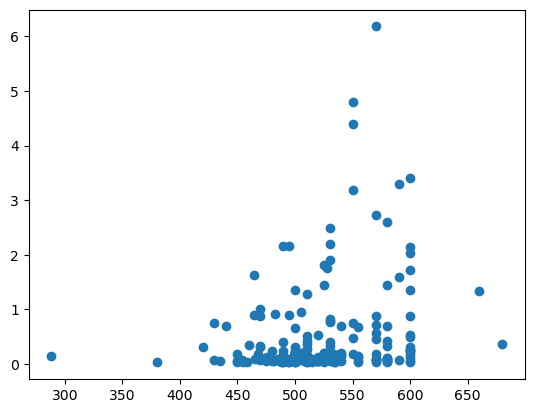

In [14]:
plt.scatter(X_lin, Y_lin)
plt.show()

In [16]:
columns_to_scale = ['BST','HP','ATK', 'DEF', 'SPA', 'SPD','SPE']
X = df[columns_to_scale]
y = df["usage_gt_0.5"]

columns_no_scale = [col for col in X.columns if col not in columns_to_scale]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)

In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale)
    ]
)

In [26]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [27]:
X_train = pd.DataFrame(X_train, columns=columns_to_scale)
X_test = pd.DataFrame(X_test, columns=columns_to_scale)

In [28]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_pred = rf_classifier.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.72
Precision: 0.40
Recall: 0.15
F1 Score: 0.22


In [40]:
from sklearn.metrics import r2_score

In [41]:
#linear regression models
y_use_raw = df["usage"] #for regression modeling
X_usage_train, X_usage_test, y_usage_train, y_usage_test = train_test_split(X, y_use_raw, test_size=0.25, random_state=42, shuffle=True)
regr = LinearRegression()
regr.fit(X_usage_train, y_usage_train)
print(regr.coef_)

predict_usage = regr.predict(X_usage_test)

#calculate r^2 of the model
r2_score(y_usage_test, predict_usage)


[ 0.00480055  0.00306801 -0.00212613  0.00562014 -0.00035603 -0.00471785
  0.0033124 ]


0.04375696373539961

In [ ]:
df.to_csv('poke_info_final.csv', index=False)